In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report


In [2]:
df=pd.read_csv("/content/iris (3).csv")

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None
   sepal_length  sepal_width  petal_length  petal_width  target
0           5.1          3.5           1.4          0.2       0
1           4.9          3.0           1.4          0.2       0
2           4.7          3.2           1.3          0.2       0
3           4.6          3.1           1.5          0.2       0
4           5.0          3.6           1.4          0.2       0
       sepal_length  sepal_width  petal_length  petal_width      target
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5

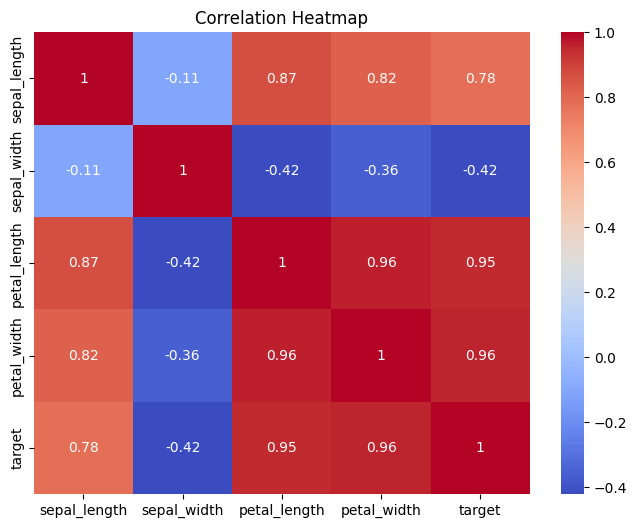


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Cross-validation scores: [0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
Mean CV Accuracy: 0.96


In [5]:
# Step 2: Dataset info
print(df.info())
print(df.head())
print(df.describe())
print("Missing values:\n", df.isnull().sum())

# Step 3: Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Step 4: Features and Target
X = df.drop("target", axis=1)
y = df["target"]

# Step 5: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 6: Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 7: KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Step 8: Prediction and Evaluation
y_pred = knn.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 9: Cross-validation
cv_scores = cross_val_score(knn, X_scaled, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

<ipython-input-6-8430ad798ecb>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='target_name', palette='Set2')


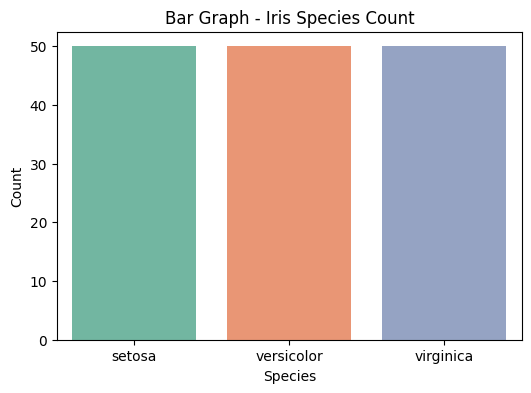

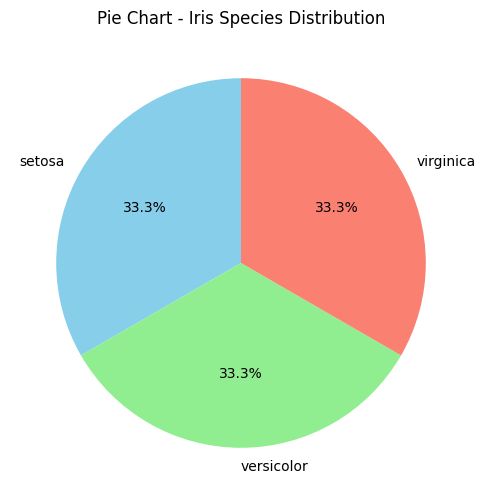

In [6]:
# Step 2.5: Visualization of class distribution

# Mapping numeric target to class names for better readability
df['target_name'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Bar Graph
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='target_name', palette='Set2')
plt.title("Bar Graph - Iris Species Count")
plt.xlabel("Species")
plt.ylabel("Count")
plt.show()

# Pie Chart
plt.figure(figsize=(6, 6))
df['target_name'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=["skyblue", "lightgreen", "salmon"])
plt.title("Pie Chart - Iris Species Distribution")
plt.ylabel("")  # Hide y-label
plt.show()


#PANDAS

   GRE Score  TOEFL Score  University Rating    SOP  LOR   CGPA  Research  \
0     320.00       110.00                  4  4.500  4.0  9.000         1   
1     300.00       105.00                  3  3.000  3.5  8.000         0   
2     310.00       115.00                  3  3.500  3.0  8.500         1   
3     315.00       109.25                  4  3.375  3.5  9.200         1   
4     311.25       107.00                  2  2.500  3.5  8.675         0   

   Chance of Admit  Quantity  
0             0.90        10  
1             0.80        10  
2             0.85        10  
3             0.95        10  
4             0.75        10  


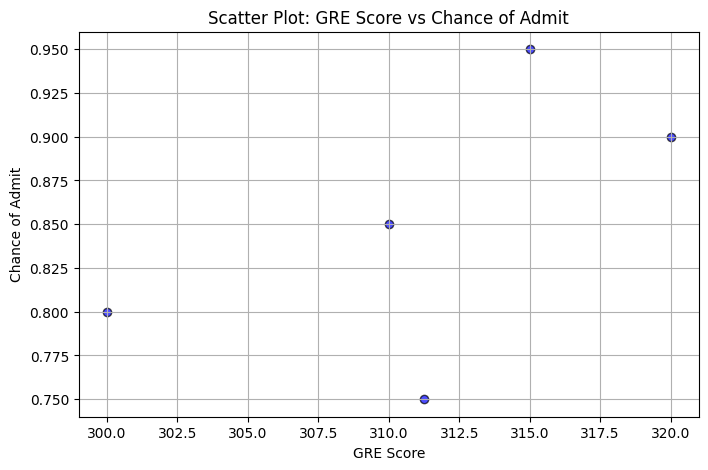

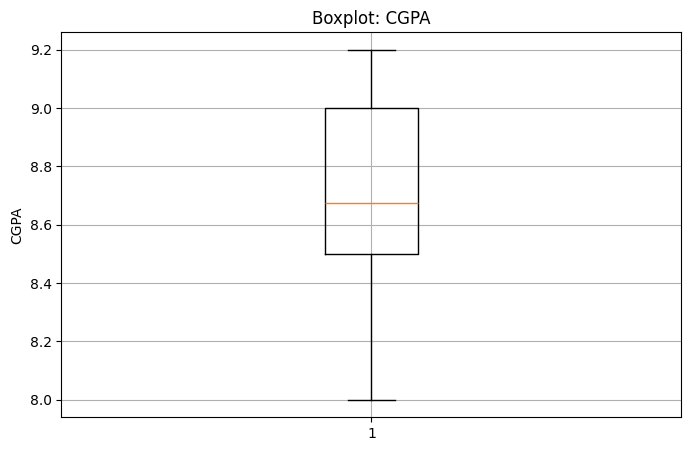

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Create the Admission_prediction DataFrame using a dictionary with sample data.
data = {
    'GRE Score': [320, 300, 310, 315, None],
    'TOEFL Score': [110, 105, 115, None, 107],
    'University Rating': [4, 3, 3, 4, 2],
    'SOP': [4.5, 3.0, 3.5, None, 2.5],
    'LOR': [4.0, 3.5, 3.0, 3.5, None],
    'CGPA': [9.0, 8.0, 8.5, 9.2, None],
    'Research': [1, 0, 1, 1, 0],
    'Chance of Admit': [0.9, 0.8, 0.85, 0.95, 0.75]
}

Admission_prediction = pd.DataFrame(data)

# Add a new column called 'Quantity' with all entries set to 10.
Admission_prediction['Quantity'] = 10

# Various methods to handle missing values:
# ------------------------------------------

# 1. Fill missing values with the mean of each column:
# Admission_prediction.fillna(Admission_prediction.mean(), inplace=True)

# 2. Alternatively, fill missing values with the median for each column:
# Admission_prediction.fillna(Admission_prediction.median(), inplace=True)

# 3. Alternatively, fill missing values with the mode for each column (using the first mode value):
# for col in Admission_prediction.columns:
#     if Admission_prediction[col].isnull().any():
#         Admission_prediction[col].fillna(Admission_prediction[col].mode()[0], inplace=True)

# 4. Alternatively, drop rows with any missing values:
# Admission_prediction.dropna(inplace=True)

# Choose one of the methods above based on your needs.
# For this example, we'll use the mean.
Admission_prediction.fillna(Admission_prediction.mean(), inplace=True)

# Check that missing values have been handled
print(Admission_prediction)

# Draw a scatter plot comparing 'GRE Score' vs 'Chance of Admit'
plt.figure(figsize=(8, 5))
plt.scatter(Admission_prediction['GRE Score'], Admission_prediction['Chance of Admit'],
            alpha=0.7, color='blue', edgecolor='k')
plt.title('Scatter Plot: GRE Score vs Chance of Admit')
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit')
plt.grid(True)
plt.show()

# Draw a boxplot for the 'CGPA' column to show its distribution.
plt.figure(figsize=(8, 5))
plt.boxplot(Admission_prediction['CGPA'])
plt.title('Boxplot: CGPA')
plt.ylabel('CGPA')
plt.grid(True)
plt.show()
